# Import Libraries

In [23]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer

# Import Data

In [24]:
df = pd.read_csv('wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Data Deccreption

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [27]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# Visualisasi Data

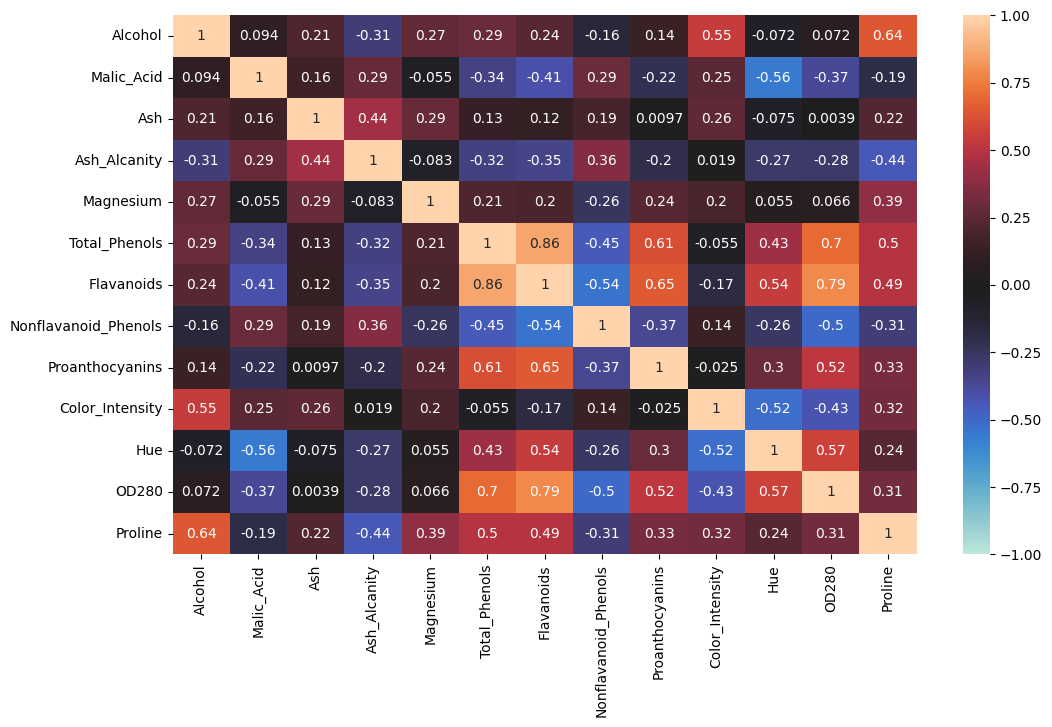

In [28]:
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

# Menentuan Jumlah Cluster yang Optimal dengan Elbow

In [29]:
k_values = list()
sse = list()

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10).fit(wine_scaled)
    k_values.append(i)
    sse.append(kmeans.inertia_)

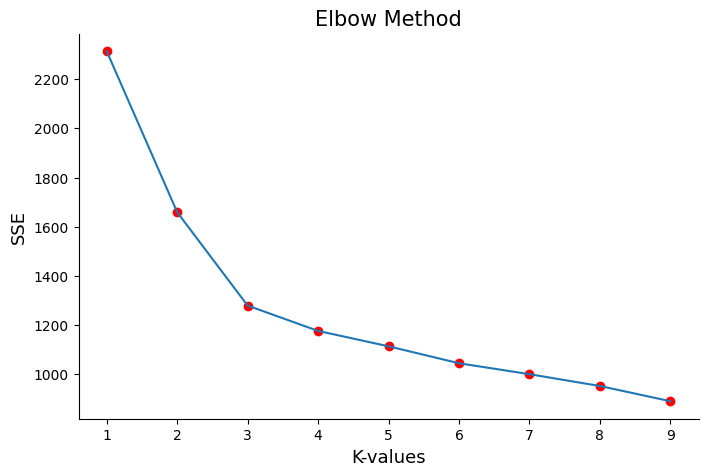

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(k_values, sse)
ax.scatter(k_values, sse, c='r')

ax.set_title('Elbow Method', fontsize=15)
ax.set_xlabel('K-values', fontsize=13)
ax.set_ylabel('SSE', fontsize=13)

ax.spines[['top', 'right']].set_visible(False)


plt.show()

# Data Processing

Dalam Data Processing saya akan melakukan PCA untuk dataset ini.

Principal component analysis (PCA) adalah teknik untuk mengurangi dimensi dataset, meningkatkan interpretasi tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [31]:
scaler = StandardScaler()

wine_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'PC2')

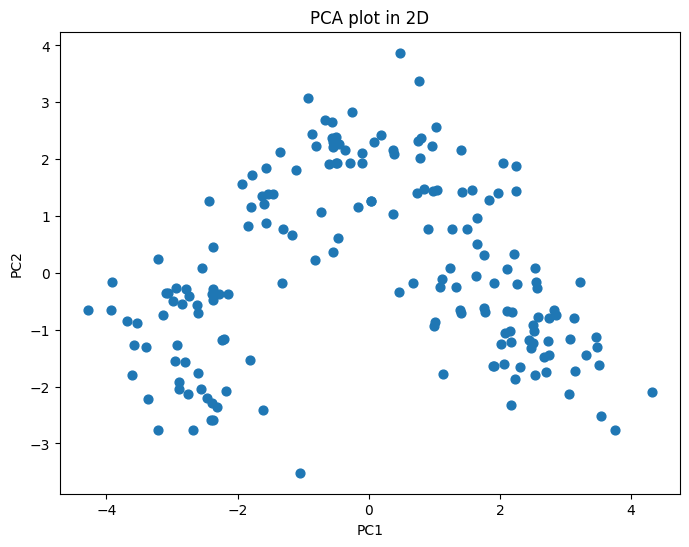

In [32]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
plt.figure(figsize=(8,6))
X_pca = pca.fit_transform(wine_scaled)
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])


plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)


plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine_scaled)

principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


Text(0, 0.5, 'PC2')

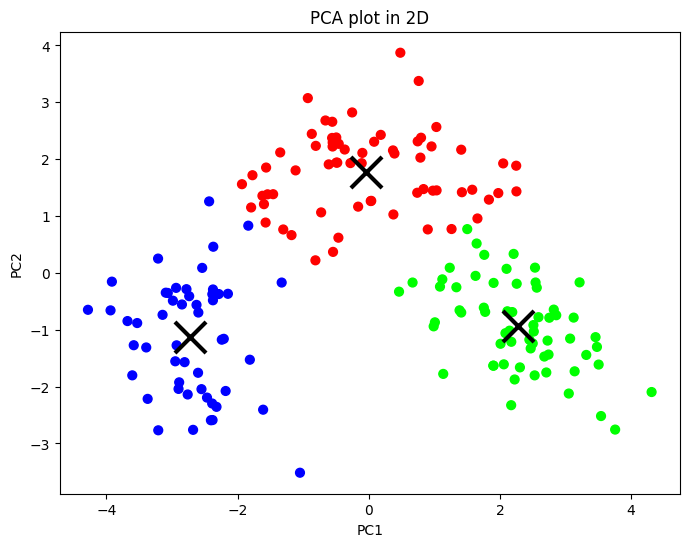

In [34]:
KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

clusters = kkmeansmeans.fit_predict(wine_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8,6))

plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Save File

In [36]:
import pickle

filename = 'wine_clustering.sav'
pickle.dump(kmeans,open(filename,'wb'))
